In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.colors as clrs
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib nbagg

### sample data 생성
f = -x1 - x2 를 dicision boundary로 갖는 데이터를 생성한다

In [47]:
def data2d_create(center,num,r = 3):
    data = np.random.randn(num,2)*r
    data[:,0] = data[:,0] + center[0]
    data[:,1] = data[:,1] + center[1]
    return data

In [92]:
num_of_data = 1000
class1=data2d_create((-10,-10),num_of_data)
class2=data2d_create((10,10),num_of_data)
class1=np.concatenate([class1,np.ones((num_of_data,1))],1)
class2=np.concatenate([class2,-np.ones((num_of_data,1))],1)
print(class1.shape,class2.shape)

(1000, 3) (1000, 3)


In [93]:
#class1[0][0] =-8000 # -Y\*y vs Max(0,-Y\*y)

In [94]:
class1[:5]

array([[ -9.06887314,  -5.64078098,   1.        ],
       [ -8.7124022 , -10.37496034,   1.        ],
       [-13.52308641, -13.30291872,   1.        ],
       [ -8.1032149 ,  -9.50346349,   1.        ],
       [ -5.45838118, -14.65342372,   1.        ]])

In [95]:
class2[:5]

array([[  6.34172612,   7.11336857,  -1.        ],
       [  7.04628259,   2.94290691,  -1.        ],
       [  7.45223671,  13.12394001,  -1.        ],
       [ 10.49400352,  10.18427728,  -1.        ],
       [  7.47080424,  11.36831693,  -1.        ]])

<IPython.core.display.Javascript object>


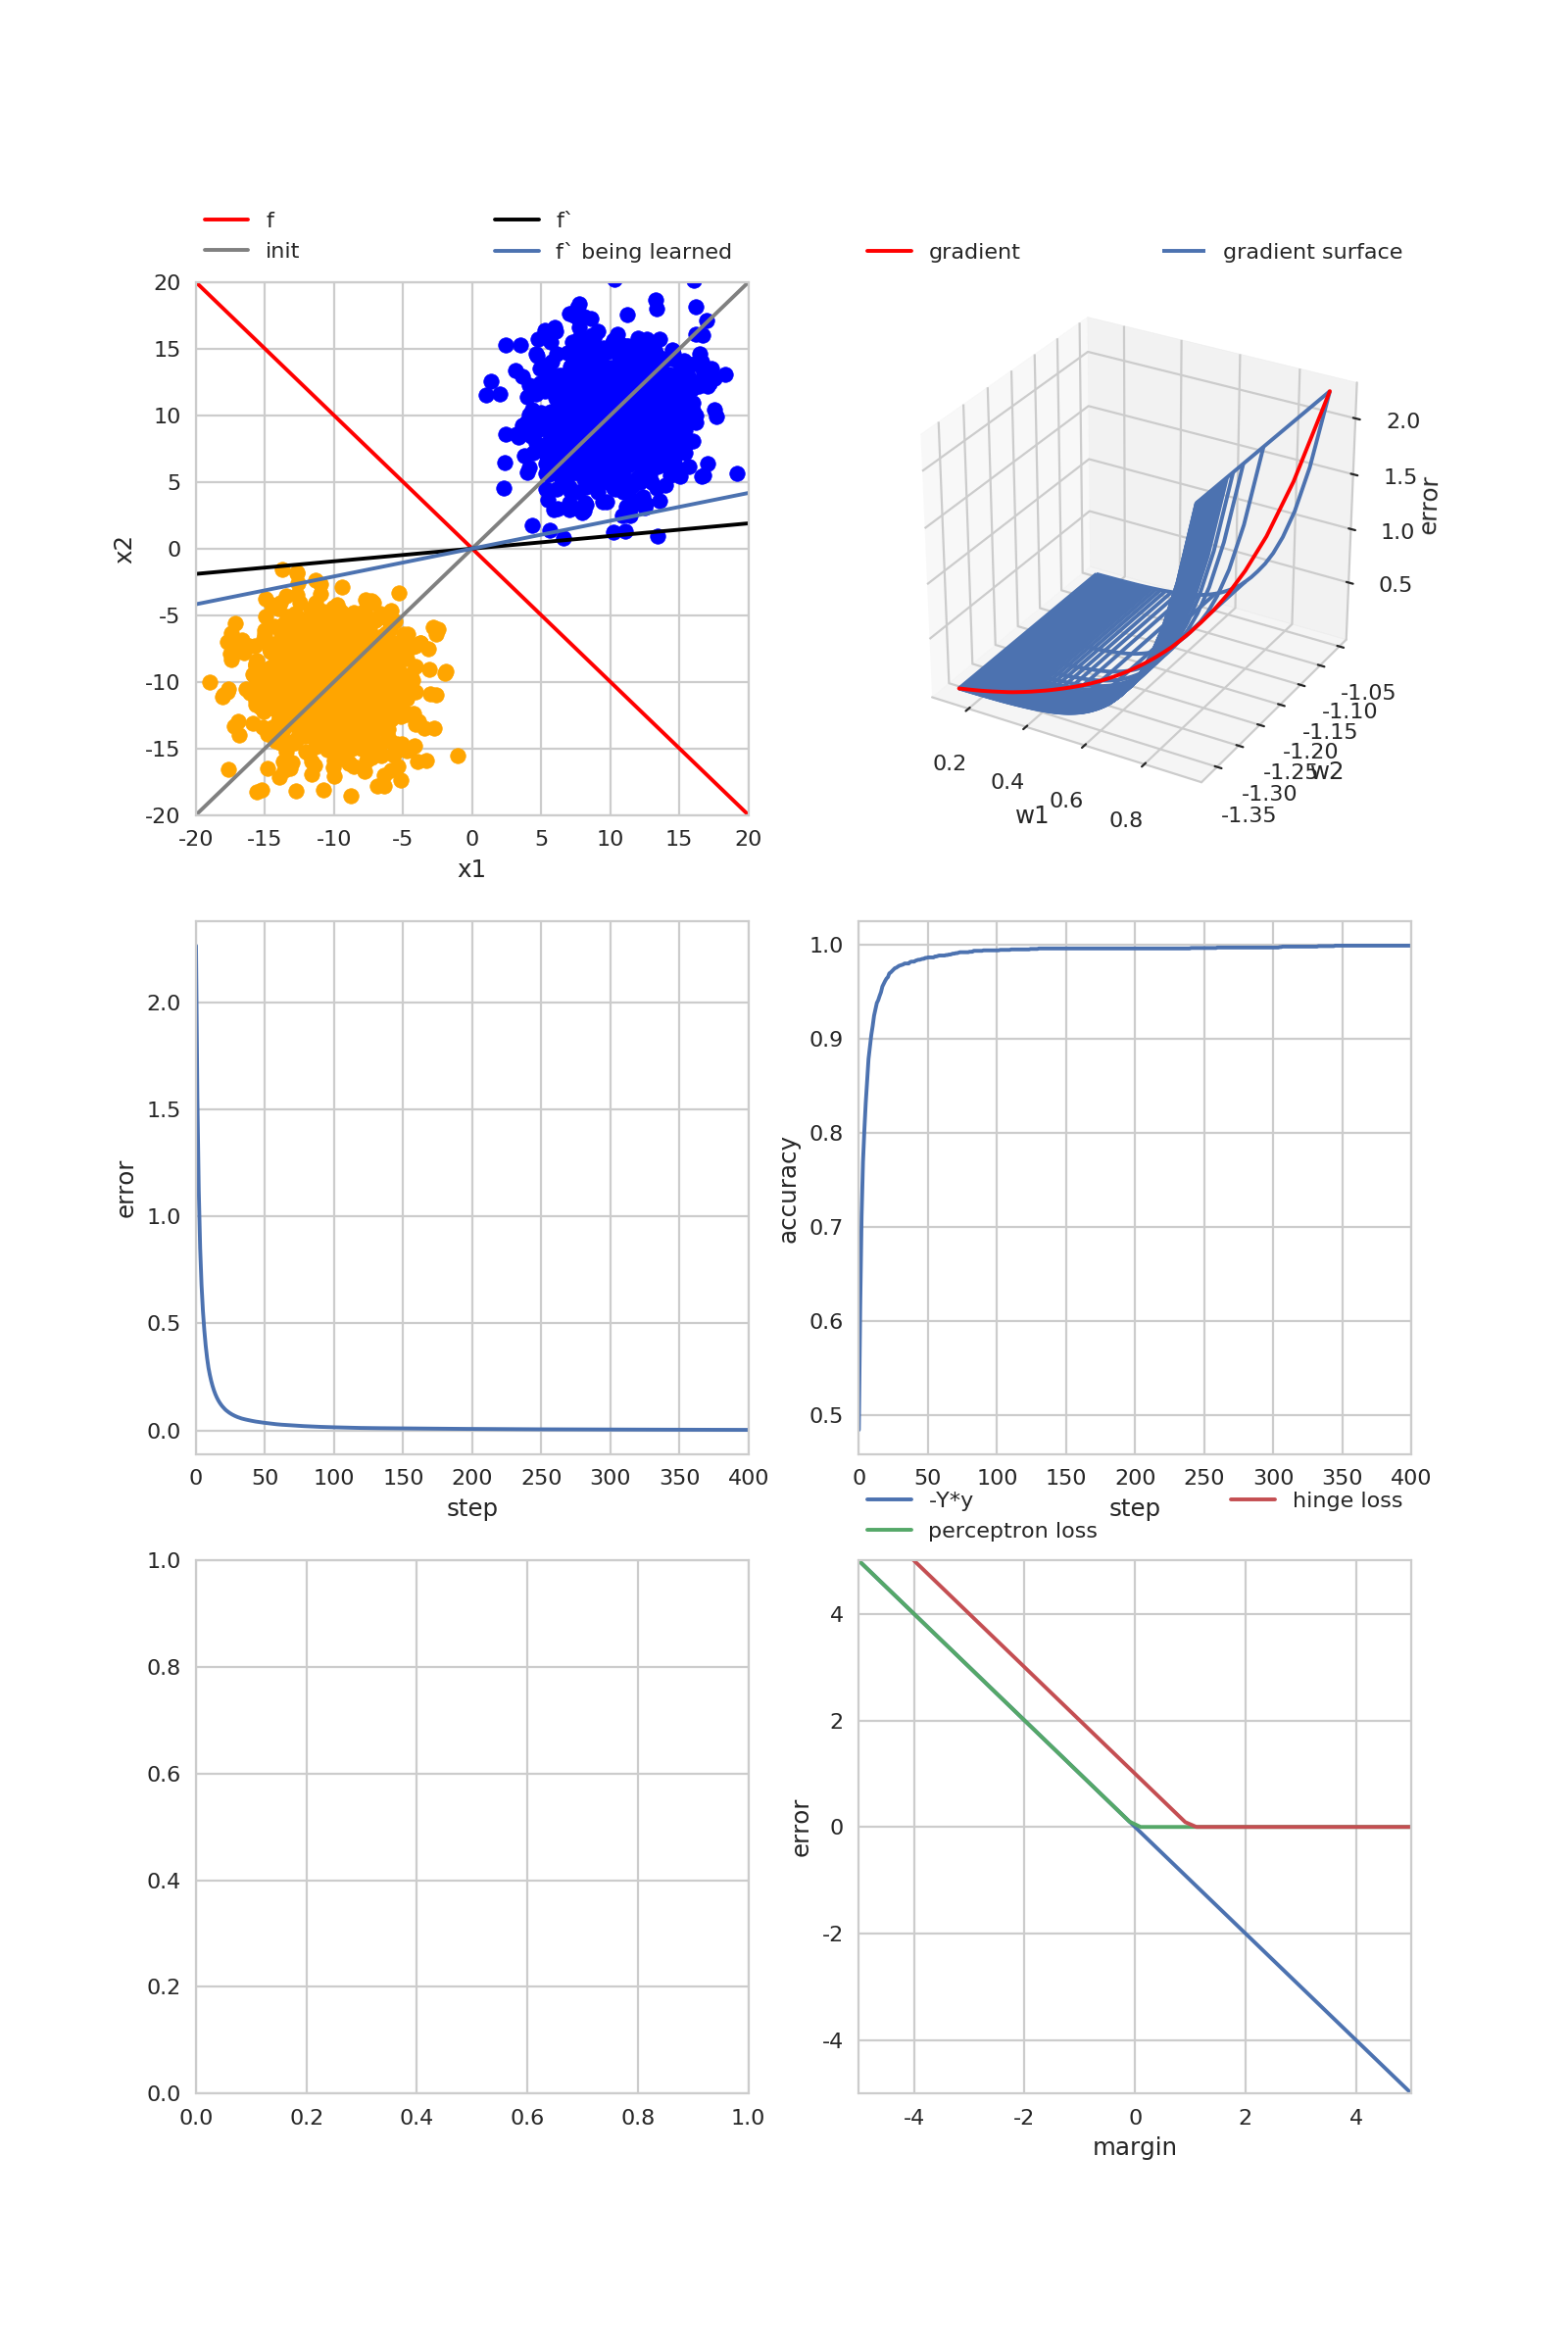

In [96]:
fig, [[ax1,ax2],[ax3,ax4],[_,_]] = plt.subplots(nrows=3,ncols=2,figsize=(10,15),dpi=80)

ax1.set_ylim(-20,20)
ax1.set_xlim(-20,20)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

x = np.linspace(-800,800,100)
ax1.plot(x,-x,label = 'f',c='red')
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.scatter(class1[:,0],class1[:,1],c='orange',)
ax1.scatter(class2[:,0],class2[:,1],c='blue')

ax2.axis('off')
_.set_xlabel("margin")
_.set_ylabel("error")

margin = np.linspace(-10,10,100)
_.set_ylim(-5,5)
_.set_xlim(-5,5)
_.plot(margin,-margin,label='-Y*y')
_.plot(margin,np.maximum(0,-margin),label='perceptron loss')
_.plot(margin,np.maximum(0,1-margin),label='hinge loss')
_.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [97]:
train = np.concatenate([class1,class2],0)
np.random.shuffle(train)
train[:5]

array([[ 12.61149211,   5.63282423,  -1.        ],
       [ 10.93345839,   8.40240108,  -1.        ],
       [  7.3089738 ,   6.7854647 ,  -1.        ],
       [ 11.23681279,  12.0632298 ,  -1.        ],
       [ 10.3764716 ,  12.00353828,  -1.        ]])

In [98]:
train_X = train[:,:2]
train_Y = train[:,2]

### hyper parameter 입력

In [99]:
def binary_activation(x):
    cond = tf.less(x, tf.zeros(tf.shape(x)))
    out = tf.where(cond, -tf.ones(tf.shape(x)), tf.ones(tf.shape(x)))
    return out

In [100]:
learning_rate = 0.01
epoch = 400

### tesorflow symbol 선언

In [101]:
X = tf.placeholder(tf.float32,shape =[None,2])
Y = tf.placeholder(tf.float32,shape =[None,1])

W = tf.Variable([[1.0],[-1.0]])
b = tf.Variable(tf.zeros([1]))

### symbol 관계정의

In [102]:
f = tf.matmul(X,W)+b
accuracy = tf.reduce_mean(tf.cast(tf.equal(binary_activation(f),Y),tf.float32))

error = tf.reduce_mean(tf.maximum(0.0,1-Y*f)) # hinge loss
#error = tf.reduce_mean(tf.maximum(0.0,-Y*f)) # perceptron loss
#error = tf.reduce_mean(-Y*f) # not use max

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(error)

### seesion 정의 및 실행

In [103]:
w_list = []
b_list = []
error_list = []
acc_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    init_w = sess.run(W)
    init_b = sess.run(b)
    
    ax1.plot(x,-init_w[0]/init_w[1]*x+init_b,label='init',c='gray')
    
    w_list.append([init_w[0][0],init_w[1][0]])
    b_list.append(init_b[0])
    
    for step in range(epoch):
        
        _,weight,bias, cost_val,acc_val = sess.run([train_op,W,b, error, accuracy], 
                                       feed_dict={X: train_X, Y: train_Y.reshape(len(train_Y),1)})
        
        print("step: ",step,"\tw1, w2: ",weight[0],weight[1],"\tb: ",bias,"\terror: ", cost_val,"\tacc: ",acc_val)
        
        w_list.append([weight[0][0],weight[1][0]])
        b_list.append(bias[0])
        error_list.append(cost_val)
        acc_list.append(acc_val)
        
        
    ax1.plot(x,-w_list[-1][0]/w_list[-1][1]*x+bias[-1],label='f`',c='black')
    
    
    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
#     print("\n=== Test ===")
#     print("X:, ",test)
#     print("Y:", sess.run(f, feed_dict={X: test}))

step:  0 	w1, w2:  [ 0.9291544] [-1.0543437] 	b:  [-0.000185] 	error:  2.26769 	acc:  0.4845
step:  1 	w1, w2:  [ 0.87210238] [-1.09449768] 	b:  [-0.000265] 	error:  1.5524 	acc:  0.616
step:  2 	w1, w2:  [ 0.82651824] [-1.12406826] 	b:  [-0.000315] 	error:  1.11991 	acc:  0.7125
step:  3 	w1, w2:  [ 0.78897417] [-1.14685035] 	b:  [-0.000215] 	error:  0.853223 	acc:  0.7695
step:  4 	w1, w2:  [ 0.75775439] [-1.16465104] 	b:  [-0.00014] 	error:  0.679191 	acc:  0.8035
step:  5 	w1, w2:  [ 0.73072314] [-1.17934334] 	b:  [ -3.49999682e-05] 	error:  0.558665 	acc:  0.8325
step:  6 	w1, w2:  [ 0.70607734] [-1.19234455] 	b:  [  5.50000477e-05] 	error:  0.468642 	acc:  0.8555
step:  7 	w1, w2:  [ 0.68421715] [-1.20346141] 	b:  [ 0.000155] 	error:  0.395987 	acc:  0.879
step:  8 	w1, w2:  [ 0.66437215] [-1.2132709] 	b:  [ 0.00025] 	error:  0.338787 	acc:  0.892
step:  9 	w1, w2:  [ 0.64742374] [-1.22127783] 	b:  [ 0.000275] 	error:  0.293046 	acc:  0.9045
step:  10 	w1, w2:  [ 0.63167143] [-1.

step:  150 	w1, w2:  [ 0.25505847] [-1.34554636] 	b:  [-0.003055] 	error:  0.00915047 	acc:  0.9965
step:  151 	w1, w2:  [ 0.25427866] [-1.34567869] 	b:  [-0.003065] 	error:  0.0090879 	acc:  0.9965
step:  152 	w1, w2:  [ 0.25356123] [-1.34579551] 	b:  [-0.00307] 	error:  0.00902561 	acc:  0.9965
step:  153 	w1, w2:  [ 0.2528438] [-1.34591234] 	b:  [-0.003075] 	error:  0.00897277 	acc:  0.9965
step:  154 	w1, w2:  [ 0.25212637] [-1.34602916] 	b:  [-0.00308] 	error:  0.00891993 	acc:  0.9965
step:  155 	w1, w2:  [ 0.25140893] [-1.34614599] 	b:  [-0.003085] 	error:  0.00886709 	acc:  0.9965
step:  156 	w1, w2:  [ 0.2506915] [-1.34626281] 	b:  [-0.00309] 	error:  0.00881426 	acc:  0.9965
step:  157 	w1, w2:  [ 0.24997406] [-1.34637964] 	b:  [-0.003095] 	error:  0.00876142 	acc:  0.9965
step:  158 	w1, w2:  [ 0.24925661] [-1.34649646] 	b:  [-0.0031] 	error:  0.00870858 	acc:  0.9965
step:  159 	w1, w2:  [ 0.24853916] [-1.34661329] 	b:  [-0.003105] 	error:  0.00865574 	acc:  0.9965
step:  1

step:  238 	w1, w2:  [ 0.19749391] [-1.35453236] 	b:  [-0.00355001] 	error:  0.0052319 	acc:  0.9965
step:  239 	w1, w2:  [ 0.19694299] [-1.35461116] 	b:  [-0.00355001] 	error:  0.00520093 	acc:  0.9965
step:  240 	w1, w2:  [ 0.19639206] [-1.35468996] 	b:  [-0.00355001] 	error:  0.00516995 	acc:  0.997
step:  241 	w1, w2:  [ 0.19584113] [-1.35476875] 	b:  [-0.00355001] 	error:  0.00513898 	acc:  0.997
step:  242 	w1, w2:  [ 0.19529021] [-1.35484755] 	b:  [-0.00355001] 	error:  0.00510801 	acc:  0.997
step:  243 	w1, w2:  [ 0.19480254] [-1.35491359] 	b:  [-0.00355501] 	error:  0.00507867 	acc:  0.997
step:  244 	w1, w2:  [ 0.19431487] [-1.35497963] 	b:  [-0.00356001] 	error:  0.00505445 	acc:  0.997
step:  245 	w1, w2:  [ 0.1938272] [-1.35504568] 	b:  [-0.00356501] 	error:  0.00503023 	acc:  0.997
step:  246 	w1, w2:  [ 0.19333953] [-1.35511172] 	b:  [-0.00357001] 	error:  0.00500601 	acc:  0.997
step:  247 	w1, w2:  [ 0.19285186] [-1.35517776] 	b:  [-0.00357501] 	error:  0.00498179 	ac

step:  326 	w1, w2:  [ 0.15872927] [-1.35947537] 	b:  [-0.00432001] 	error:  0.0034778 	acc:  0.9985
step:  327 	w1, w2:  [ 0.15832661] [-1.3595227] 	b:  [-0.00432501] 	error:  0.00346136 	acc:  0.9985
step:  328 	w1, w2:  [ 0.15792395] [-1.35957003] 	b:  [-0.00433001] 	error:  0.00344492 	acc:  0.9985
step:  329 	w1, w2:  [ 0.15752129] [-1.35961735] 	b:  [-0.00433501] 	error:  0.00342848 	acc:  0.9985
step:  330 	w1, w2:  [ 0.15711863] [-1.35966468] 	b:  [-0.00434001] 	error:  0.00341204 	acc:  0.9985
step:  331 	w1, w2:  [ 0.15671597] [-1.359712] 	b:  [-0.00434501] 	error:  0.0033956 	acc:  0.9985
step:  332 	w1, w2:  [ 0.15631332] [-1.35975933] 	b:  [-0.00435001] 	error:  0.00337916 	acc:  0.999
step:  333 	w1, w2:  [ 0.15591066] [-1.35980666] 	b:  [-0.00435501] 	error:  0.00336272 	acc:  0.999
step:  334 	w1, w2:  [ 0.155508] [-1.35985398] 	b:  [-0.00436001] 	error:  0.00334628 	acc:  0.999
step:  335 	w1, w2:  [ 0.15510534] [-1.35990131] 	b:  [-0.00436501] 	error:  0.00332984 	acc

### graph3 error 변화

In [104]:
ax3.set_xlim(0,epoch)
ax3.set_xlabel("step")
ax3.set_ylabel("error")

step = np.linspace(0,epoch,epoch)
ax3.plot(step,error_list)

### graph4 accuracy 변화

In [105]:
ax4.set_xlim(0,epoch)
ax4.set_xlabel("step")
ax4.set_ylabel("accuracy")

step = np.linspace(0,epoch,epoch)
ax4.plot(step,acc_list)

### error surface

In [106]:
ax2 = fig.add_subplot(322, projection='3d')
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_zlabel("error")
w1, w2 = np.meshgrid(np.array(w_list)[1:,0], np.array(w_list)[1:,1])
ax2.plot_wireframe(w1, w2, error_list,label='gradient surface')
ax2.plot(np.array(w_list)[1:,0], np.array(w_list)[1:,1],error_list,c='red',label='gradient')
ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

### graph1 f\` 변화

In [107]:
def init(w,b):
    line.set_ydata(-w[0][0]/w[0][1]*x+b[0])
    return line,

def animate(i,w,b):
    line.set_ydata(-w[i][0]/w[i][1]*x+b[i])
    return line,

In [108]:
line, = ax1.plot(x,w_list[0][1]/w_list[1][0]*x + b_list[0],label='f` being learned ')
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ani = animation.FuncAnimation(fig,animate,np.arange(0,epoch),interval=100,blit=True,fargs=(w_list,b_list,))